# STA 208: Homework 2 (Do not distribute)

## Due 4/24/19 at midnight

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (30 pts)

Consider Poisson model with rate parameter $\lambda$ which has PMF,
$$
p(y|\lambda) = \frac{\lambda^y}{y!} e^{-\lambda},
$$
where $y = 0,1,\ldots$ is some count variable.
In Poison regression, we model $\lambda = e^{\beta^\top x}$ to obtain $p(y | x,\beta)$.

1. Let the loss function for Poisson regression be $\ell_i(\beta) \propto - \log p(y_i | x_i, \beta)$ for a dataset consisting of predictor variables and count values $\{x_i,y_i\}_{i=1}^n$.  Here $\propto$ means that we disregard any additive terms that are not dependent on $\beta$.  Write an expression for $\ell_i$ and derive its gradient. 
2. Show that the empirical risk $R_n(\beta)$ is a convex function of $\beta$.
3. Consider the mapping $F_\eta(\beta) = \beta - \eta \nabla R_n(\beta)$ which is the iteration of gradient descent ($\eta>0$ is called the learning parameter).  Show that at the minimizer of $R_n$, $\hat \beta$, we have that $F(\hat \beta) = \hat \beta$.
4. I have a script to simulate from this model below.  Implement the gradient descent algorithm above and show that with enough data (n large enough) the estimated $\hat \beta$ approaches the true $\beta$ (you can look at the sum of square error between these two vectors).

<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>
<h3><font color="blue">Answer 1</font></h3>
<h4><font color="blue">Answer 1.1</font></h4>
<p>
    According to the information about loss function for Poisson, we know that:
    $$
    \ell_i(\beta) =-y_i\log \lambda + \lambda =  e^{\beta^\top x_i}- y_i \beta^\top x_i,
    $$
    Therefore, its gradient is:
    $$
    \nabla_{\beta} \ell_i(\beta) = 
    \begin{pmatrix}
    \frac{\partial}{\partial \beta_1}\\
    \vdots\\
    \frac{\partial}{\partial \beta_n}
    \end{pmatrix}
    (e^{\beta^\top x_i}- y_i \beta^\top x_i)       
    =(e^{\beta^\top x_i}- y_i)x_i,
    $$
</p>
<h4><font color="blue">Answer 1.2</font></h4>
<p>
    The empirical risk is $R_n(\beta)=\frac 1n \mathop{\sum}_{i=1}^n \ell_i(\beta) =\frac 1n \mathop{\sum}_{i=1}^n (e^{\beta^\top x_i}- y_i \beta^\top x_i)$.
<p>
    Its gradient is :
    $$
    \nabla_\beta R_n(\beta)
    =
    \frac 1n \sum_{i=1}^n \nabla_\beta \ell_i(\beta)
    =
    \frac 1n \sum_{i=1}^n (e^{\beta^\top x_i}- y_i)x_i.
    $$
    As for convex, considering the Hessian matrix $H_{R_n}=\nabla^2_{\beta} R_n$. For $x_i$
    \begin{align*}
    H_{\ell_i}=&(\frac{\partial^2 \ell_i}{\partial \beta_k \partial \beta_s})_{n\times n}\\
    =&e^{\beta^\top x_i} (x_i x_i^\top)\succeq 0.
    \end{align*}
    Since we know that $\frac{\partial^2 R_n}{\partial \beta_k \partial \beta_s}=\frac 1n \textstyle\sum\limits_{i=1}^n
    \frac{\partial^2   \ell_i}{\partial \beta_k \partial \beta_s}$. $H_{R_n}=\frac 1n \textstyle\sum\limits_{i=1}^n H_{\ell_i}\succeq 0$. Therefore, it is a convex function for $\beta$.
</p>
<h4><font color="blue">Answer 1.3</font></h4>
<p>
    Since at the minimizer, $\nabla_\beta R_n=0$, then $F_\eta(\hat\beta) = 
    \hat\beta - \eta \nabla_\beta R_n(\hat\beta)=\hat\beta - \eta\times 0=\hat\beta$.
</p>
<h4><font color="blue">Answer 1.4</font></h4>
<p>
    
</p>


In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
np.random.seed(5)

In [5]:
## Simulate from the Poisson regression model (use y,X)
n, p = 1000,20
X = np.random.normal(0,1,size = (n,p))
beta = np.random.normal(0,.2,size = (p))
lamb = np.exp(X @ beta)
y = np.random.poisson(lamb)

In [6]:
def grad(X,y,beta_hat,n):
    grad=1/n*(np.exp(beta_hat.T@X.T)-y) @ X
    return grad

In [7]:
def control_error(X,y,beta_hat,yita,error):
    """
    iteration condition set
    """
    n,p=X.shape
    error_prime=100
    error_list=[]
    while error_prime>error:
        beta_new=beta_hat-yita*grad(X,y,beta_hat,n)
        error_prime=sum((beta_new-beta_hat)**2)
        beta_hat=beta_new
        error_list.append(error_prime)
    return error_list

In [8]:
beta0=np.zeros(20)

In [9]:
#Control
error_list=control_error(X,y,beta0, 0.001, 10**(-10))

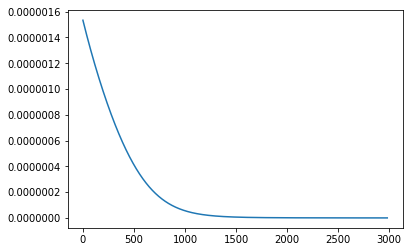

In [13]:
plt.plot(np.arange(len(error_list)),error_list)

<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>

__Exercise 2__ (30 pts)

Recall the subset selection problem with tuning parameter $k$,
$$
\min_{\beta : {\rm supp}(\beta) \le k}\| y - X \beta \|_2^2.
$$

1. Write the subset selection problem in the following form
$$
\min_{S \subseteq \{1,\ldots,p\}, |S|\le k} y^\top P_S y,
$$
where $P_S$ is a projection.  Describe the subspace that is the range of this projection.
2. Suppose that we have a nested sequence of models $S_1\subset S_2 \subset \ldots \subset S_p$ such that $|S_k| = k$ (it contains $k$ variables).  Prove that $$y^\top P_{S_k} y \ge y^\top P_{S_{k+1}} y$$ for $k=1,\ldots,p-1$.  What does this tell us about the solution to the subset selection problem and the constraint $|S| \le k$?
3. Suppose that $X$ is orthogonal, then write a computationally efficient pseudocode to solve the subset selection problem.  Prove that it is correct (your algorithm actually solves subset selection under othogonal design).
4. (Challenge) Suppose that we have that $n = p$ and $y_i = \beta_i + \epsilon_i$ (identity design matrix) where $\epsilon_i$ satisfies 
$$
\mathbb P \left\{ |\epsilon_i| \ge t \right\} \le 2 e^{-t^2 / 2\sigma^2}
$$
for any $t > 0$ (this is true for central Normal RVs) for some $\sigma > 0$.
Suppose that there is some true $S_0 \subset\{1,\ldots,p\}$ such that $|S_0| = k < p$ and ${\rm supp}(\beta) = S_0$.
Prove the following.

__Proposition__
Define $\mu = \min_{j \in S_0} |\beta_j|$ and call $\mu / \sigma$ the signal-to-noise ratio.  Then if 
$$
\frac{\mu}{\sigma} > 2 \sqrt{2 \log \left( \frac{2n}{\delta}\right)},
$$
then the true $S$ is selected by subset selection with probability at least $1 - \delta$.

Hint: rewrite the subset selection problem with $X = I$ and compare the objective at $S_0$ to any other $S$.

<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>
<font color="Blue">
<h3>Answer 2</h3>

<h4>Answer 2.1</h4>
</font>
<p>
    Note $\beta=\begin{pmatrix}
    \beta_1\\
    \vdots\\
    \beta_p
    \end{pmatrix}
    $,
    ${\rm supp} (\beta)=\{i:\beta_i\neq 0 \}$. Then the question can be written as:
\begin{align}
\min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X \beta \|_2^2
    &=\min_{|S|\leq k, S\subset \{1,\cdots, p\}} \min_{ {\rm supp}(\beta)\subset S }  \| y - X \beta \|_2^2
\end{align}
Since for $S$, the design matrix will be $X_S$ ($X_S$ means: the $i$th column in $X_S$ is the $i$th column in $X$, where $i\in S$, while other columns are zero, in other words for $X_S$ we keep $i\in S$ columns and change every other columns to zeros in $X$), and we know that the solution for this least square problem: 
    $\min\limits_{ {\rm supp}(\beta)\subset S }  \| y - X \beta \|_2^2=\min\limits_{ {\rm supp}(\beta)\subset S }  \| y - X_S \beta \|_2^2$ is that . 
$$
\hat\beta_S=(X_S^\top X_S)^{-1}X_S^\top y.
$$
The hat matrix $H_{S}=X_{S}(X_{S}^\top X_{S})^{-1}X_{S}^\top$. $H_S$ is a projection matrix, because symmetirc: $H_S^\top=H_S$, and idempotent: $H_S^2=X_{S}(X_{S}^\top X_{S})^{-1}X_{S}^\top X_{S}(X_{S}^\top X_{S})^{-1}X_{S}^\top=X_{S}(X_{S}^\top X_{S})^{-1}X_{S}^\top=H_S$.
</p>
<p>
    Then, the projection matrix in the formula can be represented as $P_S=I-H_S$. Then we have the $SSE(S)=y^\top P_S y=\min\limits_{ {\rm supp}(\beta)\subset S }  \| y - X \beta \|_2^2$. Therefore:
    \begin{equation}
        \min_{\beta : |{\rm supp}(\beta)| \le k}\| y - X \beta \|_2^2=
    \min_{|S|\leq k, S\subset \{1,\cdots, p\}} y^\top P_S y
    \end{equation}
    $P_S$ is projection matrix too. Since it is symmetric: $P_S^\top=I^\top-H_S^\top=I-H_S=P_S$, and idempotent: $P_S^2 = I-H_S-H_S+H_S^2=I-H_S-H_S+H_S=I-H_S=P_S$.
    The projection space is the column space of $X_S$'s orthogonal complement, $\{\text{column space of }X_S\}^\perp$. 
    
</p>
<font color="Blue"><h4>Answer 2.2</h4></font>
<p>
   According to the previous results:$SSE(S)=y^\top P_S y=\min\limits_{ {\rm supp}(\beta)\subset S }  \| y - X \beta \|_2^2$. Then:
    \begin{align}
    SSE(S_k)&=y^\top P_{S_k} y=\min\limits_{ {\rm supp}(\beta)\subset S_k }  \| y - X \beta \|_2^2,\\
    SSE(S_{k+1})&=y^\top P_{S_{k+1}} y=\min\limits_{ {\rm supp}(\beta)\subset S_{k+1} }  \| y - X \beta \|_2^2.
    \end{align}
    Since $S_k\subset S_{k+1}$, we have:
    \begin{align*}
    \min\limits_{ {\rm supp}(\beta)\subset S_k }  \| y - X \beta \|_2^2
    &\leq \min\limits_{ {\rm supp}(\beta)\subset S_{k+1} }  \| y - X \beta \|_2^2,\\
    \text{i.e. } y^\top P_{S_k} y&\leq y^\top P_{S_{k+1}} y.
    \end{align*}
    Therefore, for the constraint  $|S| \le k$, we know that we get the solution when $|S|=k$.
</p>


<font color="Blue"><h4>Answer 2.3</h4></font>
<p>
    The steps:
<ol>
<li>Calculate: $X^\top y$</li>
<li>Sort the square of each element in $X^\top y$(by decreasing).</li>
<li>Select the top $k$ element's index, $\{i_1,\cdots ,i_k\}$ as $S$. </li>
<li>The design matrix is $X_S$.</li>
</ol>
Now we are going to prove the result is correct. Denote the matrix $E_{ij}$ has all its element zero, except the $i$th row and $j$th column is $1$. Since orthogonal, $X_S^\top X_S=\sum\limits_{i\in S} E_{ii}$, then the hat matrix $H_S=X_S X_S^\top$. Then the $SSE(S)=y^\top y-y^\top X_S X_S^\top y=y^\top y-(X_S^\top y)^\top X_S^\top y$, or in other word $SSR(S)=(X_S^\top y)^\top X_S^\top y=
\|X_S^\top y\|_2^2$. Since we also know that to minimize $SSE(S)_{|S|\leq k}\Leftrightarrow$ maximize $SSR_{|S|\leq k}\Leftrightarrow X_S^\top y$ choose the elements with index in $S$ in vector $X^\top y$. We choose the largest $k$ element in $X^\top y$, and let their index generate the set $S=\{i_1,\cdots , i_k\}$.
</p>


<font color="Blue"><h4>Answer 2.4</h4></font>
<p>
   Assuming that for each $i\in S_0 $, $|\beta_i|\geq\mu$, other $\beta_j$s are zero. To distinguish them, we need all the error term $\epsilon$ to flactuate at a range with joint possibility P more than $1-\delta$. 
<p>  
    In addition, since our goal is to distinguish the two group, we also need to control the $\epsilon$ so that two ranges will have no intersection, $i.e. \max\limits_{j\not\in S_0}|\epsilon_j|<\min\limits_{j\in S_0}|\beta_j+\epsilon_j|$. Since we know that $|\beta_i|\geq\mu, i\in S_0 $, A sufficient condition for this is:
    \begin{align}
     2\max\limits_{j=1,\cdots, p}|\epsilon_j| &<\mu.\\
    \text{i.e.}  \forall \epsilon, \, |\epsilon|&<\frac\mu 2.
    \end{align}
   Since we want to choose the unzero terms, and we have noises $\epsilon_i$. Therefore, the possibility to choose the right subset is the possibility to control every noise $\epsilon_i$s in $\frac \mu 2$. Finally we have:
   \begin{align}
   P(\{\forall |\epsilon_k| < \frac\mu 2\})
   &=1-P(\{\exists |\epsilon_k| \geq \frac\mu 2\})\\
   &\geq 1- \sum\limits_{i=1}^n P(\{ |\epsilon_i| \geq \frac\mu 2\})\\
   &=1- n P(\{ |\epsilon| \geq \frac\mu 2\})\\
   &=1- 2n  e^{-(\frac\mu 2)^2 / 2\sigma^2}\\
   &=1- 2n  e^{-(\frac\mu {2\sigma})^2 / 2}\\
   &=1- 2n  e^{-\log \left( \frac{2n}{\delta}\right)}\\
   &=1- 2n \left( \frac{\delta}{2n}\right)\\
   &=1-\delta. 
   \end{align} 
</p>
<p  style="background-color:rgb(0,185,185)">
    ========================================================================================================================
</p>

__Exercise 3__ (40 pts)
For this exercise, it may be helpful to use the `sklearn.linear_model` module.  I have also included a plotting tool for making the lasso path in ESL.

1. Load the training and test data using the script below.  Fit OLS on the full dataset and compute the test error.  Throughout you do not need to compute an intercept but you should normalize the X (divide by the column norms).
2. Train and tune ridge regression and compute the test error (square error loss).
3. Fit the lasso path to the data and compute the test error for each returned lasso coefficient.
4. Compare and contrast the lars path to the lasso path, what is the key difference.  Tell me when the active sets differ and how, if they do at all.
4. Extract each active set from the lasso path and recompute the restricted OLS for each.  Compute and compare the test error for each model.
5. If your boss said that they wanted a more parsimonious model (a smaller model) then which model would you choose, justify your answer.  Under which circumstance would you choose the model with the smallest test error.

In [14]:
def plot_lars(coefs, lines=False, title="Lars Path"):
    """
    Plot the lasso path where coefs is a matrix - the columns are beta vectors
    """
    xx = np.sum(np.abs(coefs.T), axis=1)
    xx /= xx[-1]
    plt.plot(xx, coefs.T)
    ymin, ymax = plt.ylim()
    if lines:
        plt.vlines(xx, ymin, ymax, linestyle='dashed')
    plt.xlabel('|coef| / max|coef|')
    plt.ylabel('Coefficients')
    plt.title(title)
    plt.axis('tight')

In [15]:
import pickle
with open('hw2.data','rb') as f:
    y_tr,X_tr,y_te,X_te = pickle.load(f)

In [75]:
import pandas as pd
from sklearn import model_selection
from sklearn.model_selection import LeaveOneOut
from sklearn import linear_model as lm
from sklearn import preprocessing as ppc
import math

# 0.Risk Class (Including two method: 1.Empirical;2.Leave one out.)

In [42]:
class risk:
    def __init__(self,mod):
        """
        ---Preliminary: choosing a model from sklearn. 
        
        ---Attribute:
            mod:A Regression Model. 
                ---The model should have:
                   1. a method "fit" 
                   2. a method "predict": return a fitted value.
        """
        self.mod = mod
        
    def loo(self,X,y):
        """
        ---Goal: To get the leave-one-out lost.
        
        ---Preliminary: from sklearn.modele_selection import LeaveOneOut 
        
        ---Input: Design matrix X, Response y.
        ---Output: Mean of the leave-one-out loss.
        """
        loo = LeaveOneOut()
        loo_sq_err=[]
        for train_index, test_index in loo.split(X):
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            self.mod.fit(X_train,y_train)
            y_hat = self.mod.predict(X_test)
            loss = np.sum((y_hat-y_test)**2)
            loo_sq_err.append(loss)
        return np.mean(loo_sq_err)
        
    def emp(self,X,y):
        """
        ---Goal: To calculate the empirical risk for square error loss.
        
        ---Input: Design matrix X, Response y.
        ---Output: Mean of the square error.
        """
        y_hat = self.mod.predict(X)
        return np.mean((y_hat-y)**2)

#  Question 1 in OLS

__Load the training and test data using the script below. Fit OLS on the full dataset and compute the test error. Throughout you do not need to compute an intercept but you should normalize the X (divide by the column norms).__

In [19]:
#Initialize the ordinary linear model
ols=lm.LinearRegression(fit_intercept=False)

In [20]:
#Normalize the data
x_ols_tr=ppc.normalize(X_tr,axis=0)
x_ols_te=ppc.normalize(X_te,axis=0)

In [43]:
#Calculate the empirical risk.
ols.fit(x_ols_tr,y_tr)
risk_OLS=risk(ols)
risk_OLS.emp(x_ols_te,y_te)

1.04114449002708

#  Question 2 in Ridge
__Train and tune ridge regression and compute the test error (square error loss).__

In [35]:
#Since the size of the normalized data is too small, we cannot see the data clear or we have to amplify the graph a lot.
#Therefore, we use scale to standardize the data.
x_rdg_tr=ppc.scale(X_tr)
x_rdg_te=ppc.scale(X_te)

In [44]:
#Calculate the empirical risk, store them in a list for latter comparison.
ridges_emp=[]
for k in np.arange(0,6,.01):
    Ridge=lm.Ridge(alpha=k)
    Ridge.fit(x_rdg_tr,y_tr)
    risk_Ridge=risk(Ridge)
    ridges_emp.append(risk_Ridge.emp(x_rdg_te,y_te))

Text(0.5, 1.0, 'Empirical Risk in Ridge Model')

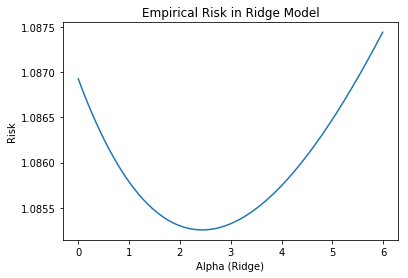

In [45]:
plt.plot(np.arange(0,6,.01),ridges_emp)
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Risk')
plt.title('Empirical Risk in Ridge Model')

In [47]:
#The fitting parameter and the minimum loss is:
np.arange(0,6,0.01)[ridges_emp.index(np.min(ridges_emp))], min(ridges_emp)
#For this part, since we use the scale to standardize the data, the results is different from normalized one.

(2.44, 1.0852563144503902)

# Question 3
__Fit the lasso path to the data and compute the test error for each returned lasso coefficient.__

In [48]:
# We use the normalized data in this problem.
x_la_tr=x_ols_tr
x_la_te=x_ols_te

In [49]:
# Get the model, since in this model we do not have a method predict and fit, we can not use the class Risk.
lasso=lm.lars_path(x_la_tr,y_tr,method="lasso")

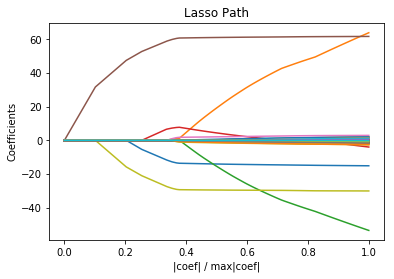

In [58]:
plot_lars(lasso[2],title= "Lasso Path")

In [51]:
err=[]
coef_lasso=lasso[2]
for i in range(103):
    err.append(np.mean((x_la_te@coef_lasso[:,i]-y_te)**2))

In [52]:
#The minimum error and the minimum error's index are
min(err),err.index(min(err))

(0.9973951358866564, 69)

Text(0.5, 1.0, 'Empirical Risk in Lasso Model Changing with a List of Coefficients')

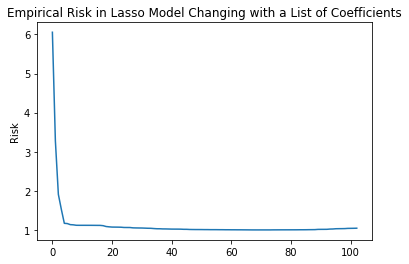

In [55]:
plt.plot(err)
plt.ylabel('Risk')
plt.title('Empirical Risk in Lasso Model Changing with a List of Coefficients')

# Question 4
__Compare and contrast the lars path to the lasso path, what is the key difference. Tell me when the active sets differ and how, if they do at all__

In [56]:
#Set the lars path
lars=lm.lars_path(x_la_tr,y_tr,method ="lar")

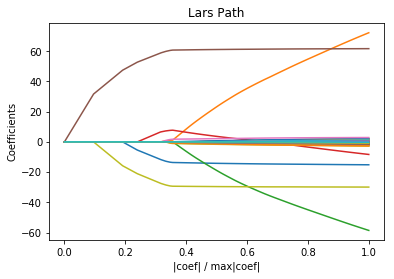

In [57]:
#Plot by using the function 
plot_lars(lars[2])

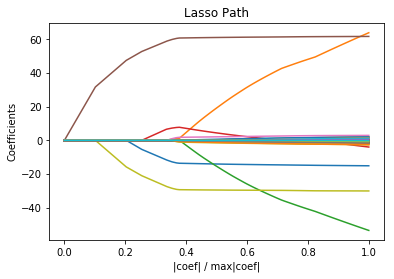

In [59]:
#Compare to the previous one, reload it
plot_lars(lasso[2],title= "Lasso Path")

<p>
    They are identical until the red coefficient cross zero at the $\frac{|\text{coef}|}{\max |\text{coef}|}$ about 0.75. Since in lasso path, knots are at "hitting" and "leaving" events, and lasso path keep decreasing $\lambda$ updating $\mathcal A$ with hitting and leaving events. However, in lars path, the procedure keep adding predict variables until all predictors have been entered, which means there are no leaving events here.
</p>

#  Question 5
__Extract each active set from the lasso path and recompute the restricted OLS for each. Compute and compare the test error for each model.__

In [60]:
#See the shape at first
lasso[2].shape

(100, 103)

In [61]:
# Use a dictionary to store the non zero indices.
# the last 2-3 positions are just blank, we can see from the graph latter. 
# We can use 101 here, but we just use 103 to fit the shape.
Unzero={}
for i in range(103):
    Unzero[i]=np.where(lasso[2][:,i]!=0)[0]

In [63]:
#we have already set ols in previous parts as ols
#and since the 
ols_rct_err=[]
p=x_la_tr.shape[1]
for i in np.arange(1,p) :
    x_tr_rct=x_la_tr[:,Unzero[i]]
    x_te_rct=x_la_te[:,Unzero[i]]
    ols.fit(x_tr_rct,y_tr)
    risk_OLS=risk(ols)
    ols_rct_err.append(risk_OLS.emp(x_te_rct,y_te))

In [81]:
# The minimum empirical risk and its index.
min(ols_rct_err),ols_rct_err.index(min(ols_rct_err)), Unzero[ols_rct_err.index(min(ols_rct_err))]

(0.9848388350452155,
 20,
 array([ 0,  1,  2,  3,  5,  8, 27, 38, 50, 52, 53, 68, 69, 76, 77, 78, 80,
        91, 96, 97], dtype=int64))

The minimum empirical risk is $0.98484$, and we choose the predictors with the orders $ 
1,2,3,4,6,9,28,39,51,53,54,69,70,77,78,79,81,92,97,98
$ to achieve the least empirical risk model.

Text(0.5, 1.0, 'Empirical Risk in Lasso Model Changing with Restricted OLS Model')

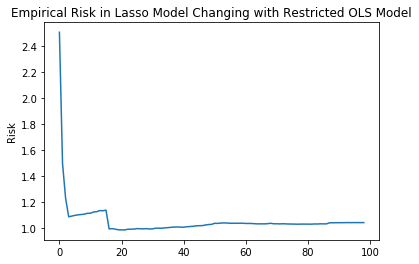

In [84]:
plt.plot(ols_rct_err)
plt.ylabel('Risk')
plt.title('Empirical Risk in Lasso Model Changing with Restricted OLS Model')

We can see that the minimum empirical risk is when we use the 21st coefficient.

# Question 6
__If your boss said that they wanted a more parsimonious model (a smaller model) then which model would you choose, justify your answer. Under which circumstance would you choose the model with the smallest test error.__

In [72]:
AIC=lm.LassoLarsIC(criterion="aic")
#Basing one the smallest error model, we use AIC to eliminate variables.
#At first we use all the data we know.
x_la=np.concatenate((x_la_tr, x_la_te), axis=0)
y_la=np.concatenate((y_tr, y_te), axis=0)
AIC.fit(x_la,y_la)
print(str(np.where(AIC.coef_!=0)))

(array([0, 3, 5, 8], dtype=int64),)


<p>
   If we just take all the data into consideration, we can just use the 1st, 4th, 6th, 9th predictors.And 4 predictors is economical.
</p>    
<p>
   However, if we considering the test error, we manually apply AIC to the test statistics. 
</p>

In [62]:
# Also store the number of predictors, so that latter we can calculate the AIC
lenth=[]
for i in range(103):
    lenth.append(len(Unzero[i]))

In [76]:
AIC_err = []
for i in range(1,x_la_tr.shape[1]):
    x_tr_rct=x_la_tr[:,Unzero[i]]
    x_te_rct=x_la_te[:,Unzero[i]]
    ols.fit(x_tr_rct,y_tr)
    y_hat = ols.predict(x_te_rct)
    #here we use the lenth
    AIC_err.append(2*lenth[i]+x_la_tr.shape[0]*math.log(np.mean((y_hat - y_te)**2)))

In [79]:
#The minimum error and the minimum error's index, and the number of predictors are
min(AIC_err),AIC_err.index(min(AIC_err)),lenth[AIC_err.index(min(AIC_err))]

(25.245694025371797, 19, 19)

In [80]:
Unzero[19]

array([ 0,  1,  2,  3,  5,  8, 27, 38, 50, 52, 53, 69, 76, 77, 78, 80, 91,
       96, 97], dtype=int64)

The predictors orders are: $1,  2,  3, 4, 6,  9, 28, 39, 51, 53, 54, 70,  77, 78, 79, 81, 92, 97, 98$. No big difference from the result in Question 5.

Therefore, I prefer the first one, since it really presented a smaller model.